In [1]:
import pandas as pd
import gzip

# Load the filtered_ID1.csv file to get the list of IDs
filtered_ids_df = pd.read_csv('/uoa/home/t05cj23/sharedscratch/main/filtered SNV/filtered_ID2.csv')

# Display the dataframe
filtered_ids_df.head(), filtered_ids_df.shape

(     chr       pos Ref_allele Alt_allele  Depth_total  Depth_ref  Depth_alt  \
 0  chr20  58893095          C          T          202        130         72   
 
    SVM_pos_score  LDrefine_twoLoci_score  LDrefine_trioLoci_score  \
 0       0.758548                     NaN                      NaN   
 
    LDrefine_merged_score   BAF_alt  
 0                    NaN  0.356436  ,
 (1, 12))

In [2]:
# Load the chr20.gl.filter.hc.cell.mat.gz file
with gzip.open('/uoa/home/t05cj23/sharedscratch/main/output/ID2/somatic/chr20.gl.filter.hc.cell.mat.gz', 'rt') as f:
    chr20_df = pd.read_csv(f, sep='\t', header=None)

# Rename the first four columns
chr20_df.rename(columns={0: "chr", 1: "pos", 2: "ref_ale", 3: "alt_ale"}, inplace=True)

# Display the first few rows of the dataframe
chr20_df.head()


/tmp/ipykernel_3886635/321949769.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  chr20_df = pd.read_csv(f, sep='\t', header=None)


,chr,pos,ref_ale,alt_ale,4,5,6,7,8,9,...,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311
0,chr20,297191,C,T,34,4.0,9.0,0.0,19.0,0|1,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,chr20,402232,T,G,95,37.0,0.0,58.0,0.0,1|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,chr20,410752,G,T,757,617.0,0.0,5.0,0.0,NaN,...,0/0,0/0,1/0,0/0,0/0,0/0,0/0,0/0,0/0,1/0
3,chr20,420228,A,C,1,0.0,0.0,0.0,1.0,1|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
4,chr20,430911,C,T,414,351.0,0.0,59.0,0.0,NaN,...,0/0,0/0,0/0,0/0,1/0,0/0,0/0,0/0,0/0,0/0


In [3]:
# Extract the 'chr' and 'pos' columns from the filtered_ids_df
filtered_chr = filtered_ids_df['chr'].iloc[0]
filtered_pos = filtered_ids_df['pos'].iloc[0]

# Filter the chr20_df based on the 'chr' and 'pos' columns
filtered_chr20_df = chr20_df[(chr20_df['chr'] == filtered_chr) & (chr20_df['pos'] == filtered_pos)]

# Display the filtered dataframe
filtered_chr20_df

,chr,pos,ref_ale,alt_ale,4,5,6,7,8,9,...,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311
1423,chr20,58893095,C,T,655,0.0,433.0,0.0,173.0,NaN,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [4]:
# Define the order of columns: 1-4, 19-20, and then the rest
columns_to_display = list(filtered_chr20_df.columns[:4])+list(filtered_chr20_df.columns[18:])

# Reorder the dataframe based on the new column order
reordered_df = filtered_chr20_df[columns_to_display]

# Display the reordered dataframe
display(reordered_df)

#Read the file to replace the column header with single-cell sequences
cell_seq_file = pd.read_csv("/uoa/home/t05cj23/sharedscratch/main/output/ID2/somatic/chr20.cell_snv.cellID.filter.csv", usecols=['cell'])

#Transpose the rows to columns
cell_seq = cell_seq_file.T

#Display the single-cell sequences
display(cell_seq)


,chr,pos,ref_ale,alt_ale,18,19,20,21,22,23,...,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311
1423,chr20,58893095,C,T,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


,0,1,2,3,4,5,6,7,8,9,...,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293
cell,CCACGGAAGGCACATG-1,CCAGCGACAGGATCGA-1,CCAGCGAAGTTTGCGT-1,CCAGCGAAGTATTGGA-1,CATGACAAGTAATCCC-1,CATGCCTAGTGTACTC-1,CCGTTCATCACTCTTA-1,CCGTTCAAGACGCAAC-1,CCTACACCACCCATGG-1,CCTAGCTCAGCCTATA-1,...,TGCCCTACAGGTTTCA-1,TGCCCTACAATACGCT-1,TGCCCATAGGCTAGAC-1,TGCCCATTCACTCCTG-1,TGCCCATTCACCGTAA-1,TGCCCATCAGTAGAGC-1,TGCCCATCAGCGTTCG-1,TGCCCATCAGCGAACA-1,TGCCCATAGTTCGCAT-1,TGCCCTACAGGTCTCG-1


In [5]:
# Extract the headers from the transposed cell sequence dataframe
new_headers = cell_seq.iloc[0, :].tolist()

# Create new column names for reordered_df starting from the 6th column onward
new_column_names = list(reordered_df.columns[:4]) + new_headers

# Check if the lengths match
if len(new_column_names) == len(reordered_df.columns):
    # Rename the columns in reordered_df
    reordered_df.columns = new_column_names
    # Display the reordered dataframe with the new column names
    display(reordered_df.head())

,chr,pos,ref_ale,alt_ale,CCACGGAAGGCACATG-1,CCAGCGACAGGATCGA-1,CCAGCGAAGTTTGCGT-1,CCAGCGAAGTATTGGA-1,CATGACAAGTAATCCC-1,CATGCCTAGTGTACTC-1,...,TGCCCTACAGGTTTCA-1,TGCCCTACAATACGCT-1,TGCCCATAGGCTAGAC-1,TGCCCATTCACTCCTG-1,TGCCCATTCACCGTAA-1,TGCCCATCAGTAGAGC-1,TGCCCATCAGCGTTCG-1,TGCCCATCAGCGAACA-1,TGCCCATAGTTCGCAT-1,TGCCCTACAGGTCTCG-1
1423,chr20,58893095,C,T,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [6]:
#Categorize Mutation Types

# Function to classify mutation status
def mutation(value):
    if value == '0/0':
        return '0'
    elif value in ['1/0', '0/1', '1/1']:
        return '1'
    else:
        return value 

# Apply the function to all columns in the reordered dataframe
mutation_df = reordered_df.map(mutation)

# Display the dataframe
print(mutation_df)

        chr       pos ref_ale alt_ale CCACGGAAGGCACATG-1 CCAGCGACAGGATCGA-1  \
1423  chr20  58893095       C       T                  0                  0   

     CCAGCGAAGTTTGCGT-1 CCAGCGAAGTATTGGA-1 CATGACAAGTAATCCC-1  \
1423                  0                  0                  0   

     CATGCCTAGTGTACTC-1  ... TGCCCTACAGGTTTCA-1 TGCCCTACAATACGCT-1  \
1423                  0  ...                  0                  0   

     TGCCCATAGGCTAGAC-1 TGCCCATTCACTCCTG-1 TGCCCATTCACCGTAA-1  \
1423                  0                  0                  0   

     TGCCCATCAGTAGAGC-1 TGCCCATCAGCGTTCG-1 TGCCCATCAGCGAACA-1  \
1423                  0                  0                  0   

     TGCCCATAGTTCGCAT-1 TGCCCTACAGGTCTCG-1  
1423                  0                  0  

[1 rows x 7298 columns]


In [8]:
# Number of Cells with this particular Mutation

# Create a new column indicating the number of mutations in each row
mutation_df['mutation_count'] = mutation_df.apply(lambda row: sum(1 for val in row if val == '1'), axis=1)

final_df = mutation_df

# Display the final dataframe
print(final_df)

        chr       pos ref_ale alt_ale CCACGGAAGGCACATG-1 CCAGCGACAGGATCGA-1  \
1423  chr20  58893095       C       T                  0                  0   

     CCAGCGAAGTTTGCGT-1 CCAGCGAAGTATTGGA-1 CATGACAAGTAATCCC-1  \
1423                  0                  0                  0   

     CATGCCTAGTGTACTC-1  ... TGCCCTACAATACGCT-1 TGCCCATAGGCTAGAC-1  \
1423                  0  ...                  0                  0   

     TGCCCATTCACTCCTG-1 TGCCCATTCACCGTAA-1 TGCCCATCAGTAGAGC-1  \
1423                  0                  0                  0   

     TGCCCATCAGCGTTCG-1 TGCCCATCAGCGAACA-1 TGCCCATAGTTCGCAT-1  \
1423                  0                  0                  0   

     TGCCCTACAGGTCTCG-1 mutation_count  
1423                  0            202  

[1 rows x 7299 columns]


In [9]:
# Create a column with information of col 1-4 is merged to one

def generate_names(df):
    df['snvID'] = df['snvID'] = df.apply(lambda row: f"{row[0]}:{row[1]}:{row[2]}:{row[3]}", axis=1)
    return df

snv_id_set = generate_names(final_df)

print(snv_id_set)

        chr       pos ref_ale alt_ale CCACGGAAGGCACATG-1 CCAGCGACAGGATCGA-1  \
1423  chr20  58893095       C       T                  0                  0   

     CCAGCGAAGTTTGCGT-1 CCAGCGAAGTATTGGA-1 CATGACAAGTAATCCC-1  \
1423                  0                  0                  0   

     CATGCCTAGTGTACTC-1  ... TGCCCATAGGCTAGAC-1 TGCCCATTCACTCCTG-1  \
1423                  0  ...                  0                  0   

     TGCCCATTCACCGTAA-1 TGCCCATCAGTAGAGC-1 TGCCCATCAGCGTTCG-1  \
1423                  0                  0                  0   

     TGCCCATCAGCGAACA-1 TGCCCATAGTTCGCAT-1 TGCCCTACAGGTCTCG-1 mutation_count  \
1423                  0                  0                  0            202   

                   snvID  
1423  chr20:58893095:C:T  

[1 rows x 7300 columns]


/tmp/ipykernel_3886635/1131646160.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['snvID'] = df['snvID'] = df.apply(lambda row: f"{row[0]}:{row[1]}:{row[2]}:{row[3]}", axis=1)


In [10]:
#No of cells having particular mutations

# Identify columns with 'mutation' values
mutation_columns = mutation_df.columns[mutation_df.eq('1').any()]

# Convert the index object to a list
mutation_columns_list = mutation_columns.tolist()

# Create a new dataframe from the list
cell_mut_df = pd.DataFrame(mutation_columns_list, columns=['Mutation_Columns'])

# Display the new dataframe
print(cell_mut_df)

       Mutation_Columns
0    TTCCCAGCAAGTAGTA-1
1    CAGCAGCGTCTTTCAT-1
2    ATGTGTGCATTGGCGC-1
3    CAGTAACTCTGAGGGA-1
4    GCTCCTATCAGCACAT-1
..                  ...
197  TCTCATAGTAGGCTGA-1
198  TCTATTGTCCAAACTG-1
199  TGCGTGGGTCTCTTTA-1
200  TGGCTGGTCTGATACG-1
201  TGATTTCCAGACGTAG-1

[202 rows x 1 columns]


In [11]:
#Extract the sequence and get info from Randolph metadata

# Load Randolph metadata TSV file
import re
randolph_metadata = pd.read_csv('/uoa/home/t05cj23/sharedscratch/git/Randolph_singlecell_metadata.tsv', sep='\t')

# Extract sequence from cell_mut_df
cell_mut_df['Extracted_CellID'] = cell_mut_df['Mutation_Columns'].apply(lambda x: re.match(r'([^-\d]+)', x).group(1))

# Extract sequence from randolph_metadata
randolph_metadata['Extracted_CellID'] = randolph_metadata['CellID'].apply(lambda x: re.search(r'_([^_]+)$', x).group(1))

# Merge the DataFrames on the extracted cell IDs
merged_df = pd.merge(cell_mut_df, randolph_metadata, on='Extracted_CellID', how='left')

display(merged_df[['Extracted_CellID', 'celltype', 'Batch']])


,Extracted_CellID,celltype,Batch
0,TTCCCAGCAAGTAGTA,CD4_T,B15_c2
1,CAGCAGCGTCTTTCAT,CD4_T,B15_c1
2,CAGCAGCGTCTTTCAT,CD4_T,B3_c1
3,ATGTGTGCATTGGCGC,CD8_T,B15_c1
4,CAGTAACTCTGAGGGA,CD4_T,B15_c1
...,...,...,...
222,TCTCATAGTAGGCTGA,CD4_T,B1_c1
223,TCTATTGTCCAAACTG,CD4_T,B1_c1
224,TGCGTGGGTCTCTTTA,CD4_T,B1_c1
225,TGGCTGGTCTGATACG,CD4_T,B1_c1


In [12]:
# Filter the results to the batch ID for the partiular dataset

# ID2 = SRR13194369 = B1_c1 [batch ID data retrieved from sra metadata file]

# Define the batch identifier to filter by
batch_to_filter = 'B1_c1'

# Filter the DataFrame for the specific batch identifier
filtered_df = merged_df[merged_df['Batch'] == batch_to_filter]
count_rows = len(filtered_df)

# Display the filtered DataFrame
print(f'Total number of cells with this mutation = {count_rows}')
display(filtered_df[['Extracted_CellID', 'celltype', 'Batch']])


Total number of cells with this mutation = 159


,Extracted_CellID,celltype,Batch
8,GGAGCAACATAAAGGT,CD4_T,B1_c1
12,ATTATCCCAGCCTATA,CD4_T,B1_c1
14,CTACCCAAGGCTCATT,monocytes,B1_c1
16,AACCATGAGAAGAAGC,CD4_T,B1_c1
18,GGGTCTGAGGATGCGT,CD4_T,B1_c1
...,...,...,...
222,TCTCATAGTAGGCTGA,CD4_T,B1_c1
223,TCTATTGTCCAAACTG,CD4_T,B1_c1
224,TGCGTGGGTCTCTTTA,CD4_T,B1_c1
225,TGGCTGGTCTGATACG,CD4_T,B1_c1


In [50]:
#Cell Type Count for Mutated

# Create DataFrame
df = pd.DataFrame(filtered_df)

# Group by SOC_indiv_ID and then count occurrences of each cell type within each group
cell_type_counts = df.groupby('SOC_indiv_ID')['celltype'].value_counts()

# List unique cell types
unique_cell_types = df['celltype'].unique()

# Display results
print("Cell Type Counts by SOC_indiv_ID:")
print(cell_type_counts)

Cell Type Counts by SOC_indiv_ID:
SOC_indiv_ID  celltype        
HMN83553      CD4_T               60
              CD8_T                9
              B                    7
              NK                   2
              NK_high_response     1
              highly_infected      1
HMN83554      CD4_T               19
              CD8_T                9
              B                    5
              NK                   2
              neutrophils          1
HMN83559      CD4_T               30
              CD8_T                6
              B                    4
              monocytes            2
              highly_infected      1
Name: count, dtype: int64


In [27]:
# Retrieve age from donor metadata

# Read the donor metadata file
donor_metadata_df = pd.read_csv('/uoa/home/t05cj23/sharedscratch/git/donor_metadata_with_batchid.csv')

#Selecting the required columns
donor_age_df = donor_metadata_df[['indiv_ID', 'batchID', 'age']]
# Merge the DataFrames
result_df = pd.merge(filtered_df, donor_age_df, left_on=['SOC_indiv_ID', 'Batch'], right_on=['indiv_ID', 'batchID'], how='left')

# Display the result
count_rows = len(result_df)
print(f'No. of Rows = {count_rows}')
display(result_df[['Extracted_CellID', 'SOC_indiv_ID','celltype', 'Batch', 'age', 'SOC_infection_status']])

No. of Rows = 159


,Extracted_CellID,SOC_indiv_ID,celltype,Batch,age,SOC_infection_status
0,GGAGCAACATAAAGGT,HMN83553,CD4_T,B1_c1,53,flu
1,ATTATCCCAGCCTATA,HMN83554,CD4_T,B1_c1,41,flu
2,CTACCCAAGGCTCATT,HMN83559,monocytes,B1_c1,47,flu
3,AACCATGAGAAGAAGC,HMN83554,CD4_T,B1_c1,41,flu
4,GGGTCTGAGGATGCGT,HMN83559,CD4_T,B1_c1,47,flu
...,...,...,...,...,...,...
154,TCTCATAGTAGGCTGA,HMN83553,CD4_T,B1_c1,53,flu
155,TCTATTGTCCAAACTG,HMN83559,CD4_T,B1_c1,47,flu
156,TGCGTGGGTCTCTTTA,HMN83553,CD4_T,B1_c1,53,flu
157,TGGCTGGTCTGATACG,HMN83554,CD4_T,B1_c1,41,flu


In [28]:
#For check total cells present in the sample

# Extract column headers
headers = mutation_df.columns.tolist()

# Slice headers after the 4th column
headers_after_4th = headers[4:5947]

total_cells_list = [{'Column': header} for header in headers_after_4th]
cell_total_df = pd.DataFrame(total_cells_list)

# Display the new DataFrame
count_rows = len(cell_total_df)
print(f'Total number of columns after the 4th column = {count_rows}')

# Load Randolph metadata TSV file
randolph_metadata = pd.read_csv('/uoa/home/t05cj23/sharedscratch/git/Randolph_singlecell_metadata.tsv', sep='\t')

# Extract sequence from cell_mut_df
cell_total_df['Extracted_CellID'] = cell_total_df['Column'].apply(lambda x: re.match(r'([^-\d]+)', x).group(1))

# Extract sequence from randolph_metadata
randolph_metadata['Extracted_CellID'] = randolph_metadata['CellID'].apply(lambda x: re.search(r'_([^_]+)$', x).group(1))

# Merge the DataFrames on the extracted cell IDs
merged_total_df = pd.merge(cell_total_df, randolph_metadata, on='Extracted_CellID', how='left')

count_rows = len(merged_total_df)
print(f'Total number of cells = {count_rows}')
print(merged_total_df)

Total number of columns after the 4th column = 5943
Total number of cells = 6886
                  Column  Extracted_CellID                   CellID  \
0     CCACGGAAGGCACATG-1  CCACGGAAGGCACATG   B1_c1_CCACGGAAGGCACATG   
1     CCACGGAAGGCACATG-1  CCACGGAAGGCACATG  B15_c2_CCACGGAAGGCACATG   
2     CCAGCGACAGGATCGA-1  CCAGCGACAGGATCGA  B15_c2_CCAGCGACAGGATCGA   
3     CCAGCGAAGTTTGCGT-1  CCAGCGAAGTTTGCGT  B11_c1_CCAGCGAAGTTTGCGT   
4     CCAGCGAAGTTTGCGT-1  CCAGCGAAGTTTGCGT  B15_c2_CCAGCGAAGTTTGCGT   
...                  ...               ...                      ...   
6881  AAAGATGTCCTTGGTC-1  AAAGATGTCCTTGGTC   B1_c1_AAAGATGTCCTTGGTC   
6882  AAAGATGTCCAGGGCT-1  AAAGATGTCCAGGGCT   B1_c1_AAAGATGTCCAGGGCT   
6883  AAAGATGCATGGGACA-1  AAAGATGCATGGGACA   B1_c1_AAAGATGCATGGGACA   
6884  AAAGATGCAGGATCGA-1  AAAGATGCAGGATCGA   B1_c1_AAAGATGCAGGATCGA   
6885  AAAGATGAGTCCGGTC-1  AAAGATGAGTCCGGTC   B1_c1_AAAGATGAGTCCGGTC   

       celltype   Batch sample_condition SOC_indiv_ID SOC_infectio

In [29]:
#For calculating total cells present in this sample

# Define the batch identifier to filter by
filter_batch = 'B1_c1'

# Filter the DataFrame for the specific batch identifier
sort_cell_total_df = merged_total_df[merged_total_df['Batch'] == filter_batch]
count_rows = len(sort_cell_total_df)

# Display the filtered DataFrame
print(f'Total number of cells = {count_rows}')
display(sort_cell_total_df[['Extracted_CellID','celltype', 'Batch', 'SOC_indiv_ID', 'SOC_infection_status']])

Total number of cells = 1811


,Extracted_CellID,celltype,Batch,SOC_indiv_ID,SOC_infection_status
0,CCACGGAAGGCACATG,CD4_T,B1_c1,HMN83553,flu
45,CCTTACGCAGCTGTGC,CD4_T,B1_c1,HMN83553,flu
47,CCTTCGAAGCACCGCT,CD4_T,B1_c1,HMN83553,flu
49,CGCGGTAAGAACAATC,monocytes,B1_c1,HMN83559,flu
51,ACGATGTAGGGTTCCC,CD4_T,B1_c1,HMN83553,flu
...,...,...,...,...,...
6881,AAAGATGTCCTTGGTC,CD4_T,B1_c1,HMN83553,flu
6882,AAAGATGTCCAGGGCT,CD4_T,B1_c1,HMN83554,flu
6883,AAAGATGCATGGGACA,CD4_T,B1_c1,HMN83559,flu
6884,AAAGATGCAGGATCGA,CD4_T,B1_c1,HMN83559,flu


In [54]:
# Total Cell Type Count

# Create DataFrame
total_df = pd.DataFrame(sort_cell_total_df)

# Group by SOC_indiv_ID and then count occurrences of each cell type within each group
total_cell_type_counts = total_df.groupby('SOC_indiv_ID')['celltype'].value_counts()

# Display results
#print("Cell Type Counts:", total_cell_type_counts)

total_cell_type_df = pd.DataFrame(total_cell_type_counts)

display(total_cell_type_df)

count
SOC_indiv_ID celltype                 
HMN83553     CD4_T                 534
             CD8_T                  92
             B                      26
             NK                     24
             monocytes               8
             infected_monocytes      6
             highly_infected         5
             DC                      1
             NK_high_response        1
HMN83554     CD4_T                 232
             CD8_T                 106
             monocytes              71
             B                      70
             NK                     34
             infected_monocytes     32
             highly_infected         7
             DC                      2
             NK_high_response        2
             neutrophils             2
             NKT                     1
HMN83559     CD4_T                 332
             CD8_T                  75
             monocytes              46
             B                      44
             NK                     29
             infected_monocytes     18
             highly_infected         6
             NK_high_response        3
             DC                      2

In [53]:
#Mutation Rate Calculation

# Create DataFrames
mutation_cell_type_df = pd.DataFrame(cell_type_counts)
total_cell_type_df = pd.DataFrame(total_cell_type_df)

# Group by SOC_indiv_ID and celltype to sum total occurrences
total_cell_type_counts = total_cell_type_df.groupby(['SOC_indiv_ID', 'celltype']).sum().reset_index().rename(columns={'count': 'total_cell_type_count'})

# Group by SOC_indiv_ID and celltype to sum mutated occurrences
mutation_cell_type_counts = mutation_cell_type_df.groupby(['SOC_indiv_ID', 'celltype']).sum().reset_index().rename(columns={'count': 'mut_cell_type_count'})

# Merge the DataFrames on 'SOC_indiv_ID' and 'celltype'
mutation_rate_df = pd.merge(total_cell_type_counts, mutation_cell_type_counts, on=['SOC_indiv_ID', 'celltype'], how='left')

# Define the human chr20 length
chromosome_length = 64444167 

# Calculate the mutation rate for each cell type
mutation_rate_df['mutation_rate'] = mutation_rate_df['mut_cell_type_count'] / mutation_rate_df['total_cell_type_count'] / chromosome_length

# Display results
count_rows = len(mutation_rate_df)
print(f'Total number of rows = {count_rows}')
display("Cell Type Counts by SOC_indiv_ID and Mutation Rates:", mutation_rate_df)

Total number of rows = 29


'Cell Type Counts by SOC_indiv_ID and Mutation Rates:'

,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate
0,HMN83553,B,26,7.0,4.177737e-09
1,HMN83553,CD4_T,534,60.0,1.743518e-09
2,HMN83553,CD8_T,92,9.0,1.517998e-09
3,HMN83553,DC,1,NaN,NaN
4,HMN83553,NK,24,2.0,1.293109e-09
5,HMN83553,NK_high_response,1,1.0,1.551731e-08
6,HMN83553,highly_infected,5,1.0,3.103462e-09
7,HMN83553,infected_monocytes,6,NaN,NaN
8,HMN83553,monocytes,8,NaN,NaN
9,HMN83554,B,70,5.0,1.108379e-09


In [55]:
# Filter and Remove the NaN values from Mutation Rate Calculation

# Sort the DataFrame by SOC_indiv_ID and celltype
mutation_rate_df_sorted = mutation_rate_df.sort_values(by=['SOC_indiv_ID', 'celltype'])

# Remove rows with NaN values
mutation_rate_df_clean = mutation_rate_df_sorted.dropna(subset=['mut_cell_type_count'])

# Display results
# Display the new DataFrame
count_rows = len(mutation_rate_df_clean)
print(f'Total number of rows = {count_rows}')
display("Cell Type Counts by SOC_indiv_ID and Mutation Rates (Sorted):", mutation_rate_df_clean)

Total number of rows = 16


'Cell Type Counts by SOC_indiv_ID and Mutation Rates (Sorted):'

,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate
0,HMN83553,B,26,7.0,4.177737e-09
1,HMN83553,CD4_T,534,60.0,1.743518e-09
2,HMN83553,CD8_T,92,9.0,1.517998e-09
4,HMN83553,NK,24,2.0,1.293109e-09
5,HMN83553,NK_high_response,1,1.0,1.551731e-08
6,HMN83553,highly_infected,5,1.0,3.103462e-09
9,HMN83554,B,70,5.0,1.108379e-09
10,HMN83554,CD4_T,232,19.0,1.270814e-09
11,HMN83554,CD8_T,106,9.0,1.317507e-09
13,HMN83554,NK,34,2.0,9.127828e-10


In [56]:
#Retrieve Age information

# Merge the DataFrames on SOC_indiv_ID and indiv_ID
age_cell_df = pd.merge(mutation_rate_df_clean, donor_age_df, left_on='SOC_indiv_ID', right_on='indiv_ID', how='left')

# Drop unnecessary columns from donor_age_df if needed (e.g., 'indiv_ID' column)
age_cell_df = age_cell_df.drop(columns=['indiv_ID'])

# Display the updated DataFrame with age information
count_rows = len(age_cell_df)
print(f'Total number of rows = {count_rows}')
#display("Updated DataFrame with Age Information:", age_cell_df)

# Filter rows where batchID is 'B1_c1'
result_filtered_df = age_cell_df.loc[age_cell_df['batchID'] == 'B1_c1']

# Display the filtered DataFrame and count of rows
count_filtered_rows = len(result_filtered_df)
print(f'Total number of rows for batchID B1_c1 = {count_filtered_rows}')
display("Filtered DataFrame with Age Information for batchID B1_c1:", result_filtered_df)

Total number of rows = 32
Total number of rows for batchID B1_c1 = 16


'Filtered DataFrame with Age Information for batchID B1_c1:'

,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate,batchID,age
0,HMN83553,B,26,7.0,4.177737e-09,B1_c1,53
2,HMN83553,CD4_T,534,60.0,1.743518e-09,B1_c1,53
4,HMN83553,CD8_T,92,9.0,1.517998e-09,B1_c1,53
6,HMN83553,NK,24,2.0,1.293109e-09,B1_c1,53
8,HMN83553,NK_high_response,1,1.0,1.551731e-08,B1_c1,53
10,HMN83553,highly_infected,5,1.0,3.103462e-09,B1_c1,53
12,HMN83554,B,70,5.0,1.108379e-09,B1_c1,41
14,HMN83554,CD4_T,232,19.0,1.270814e-09,B1_c1,41
16,HMN83554,CD8_T,106,9.0,1.317507e-09,B1_c1,41
18,HMN83554,NK,34,2.0,9.127828e-10,B1_c1,41


Not enough variation in 'age' values for cell type: B in SOC_indiv_ID: HMN83553
Not enough variation in 'age' values for cell type: CD4_T in SOC_indiv_ID: HMN83553
Not enough variation in 'age' values for cell type: CD8_T in SOC_indiv_ID: HMN83553
Not enough variation in 'age' values for cell type: NK in SOC_indiv_ID: HMN83553
Not enough variation in 'age' values for cell type: NK_high_response in SOC_indiv_ID: HMN83553
Not enough variation in 'age' values for cell type: highly_infected in SOC_indiv_ID: HMN83553
Not enough variation in 'age' values for cell type: B in SOC_indiv_ID: HMN83554
Not enough variation in 'age' values for cell type: CD4_T in SOC_indiv_ID: HMN83554
Not enough variation in 'age' values for cell type: CD8_T in SOC_indiv_ID: HMN83554
Not enough variation in 'age' values for cell type: NK in SOC_indiv_ID: HMN83554
Not enough variation in 'age' values for cell type: neutrophils in SOC_indiv_ID: HMN83554
Not enough variation in 'age' values for cell type: B in SOC_in

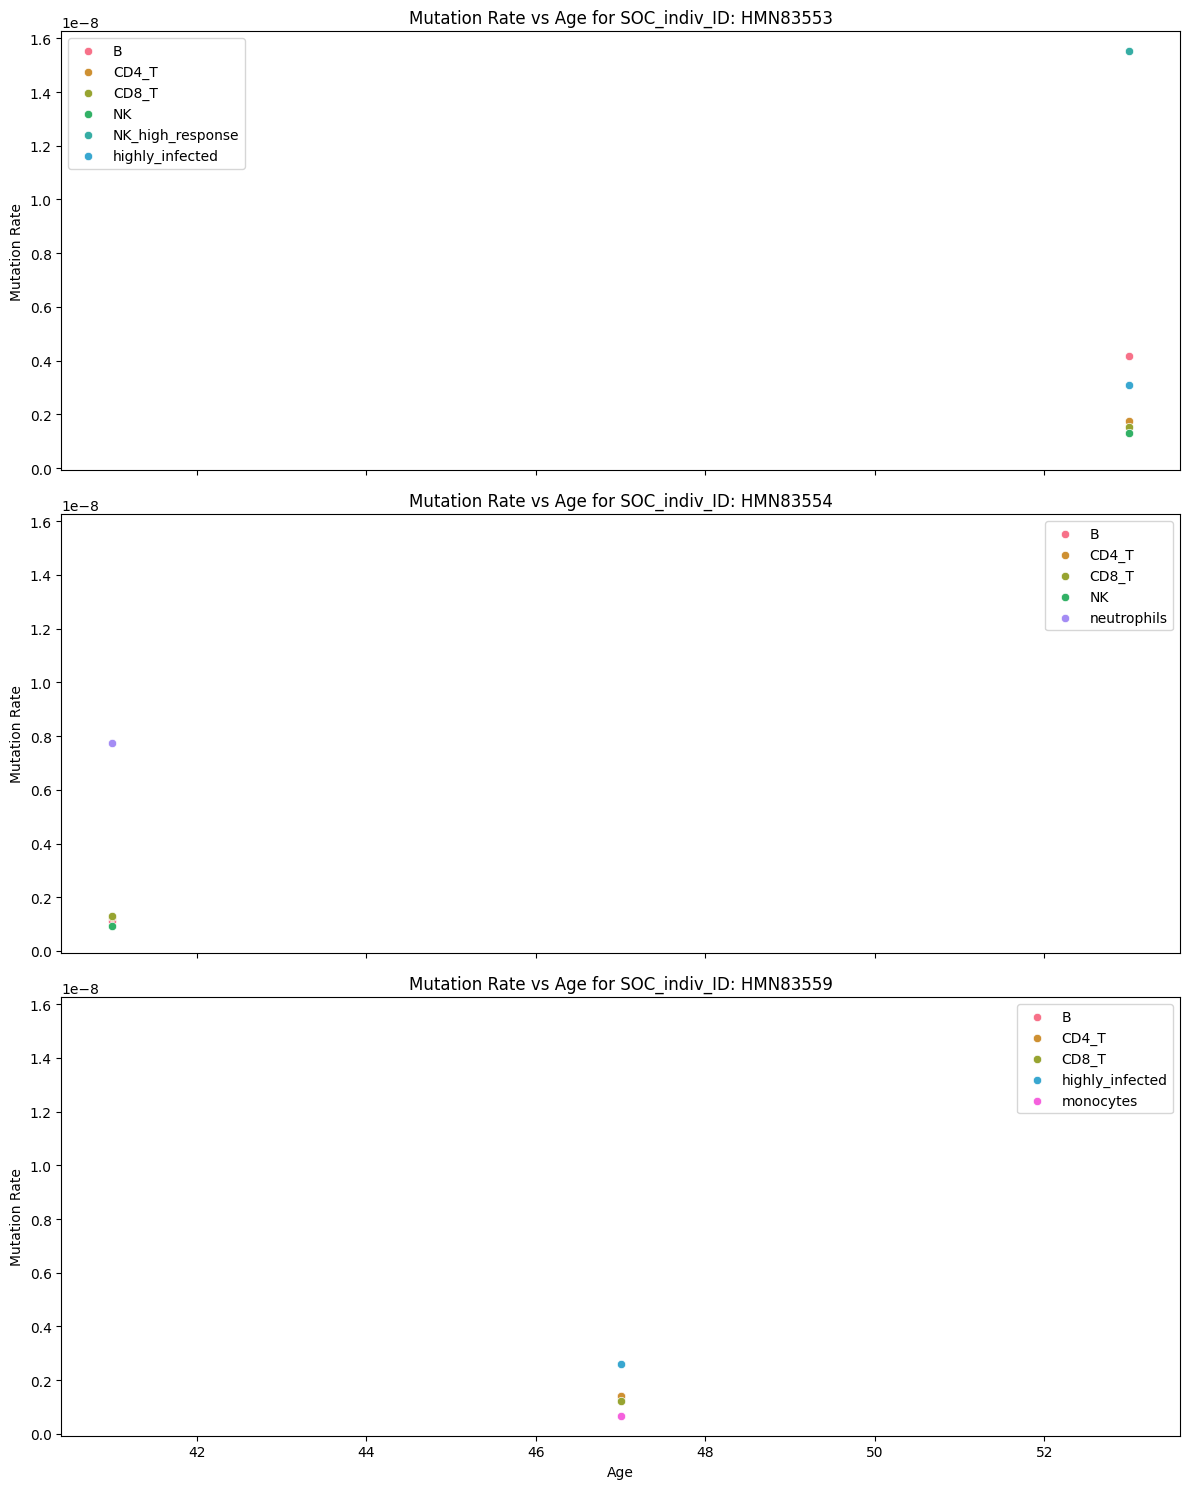

In [58]:
#Plot Graphs

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Ensure the DataFrame has no NaN values in 'age' or 'mutation_rate'
result_filtered_df = result_filtered_df.dropna(subset=['age', 'mutation_rate'])

# Get unique SOC_indiv_IDs and cell types
soc_ids = result_filtered_df['SOC_indiv_ID'].unique()
cell_types = result_filtered_df['celltype'].unique()

# Define a color palette for cell types
palette = sns.color_palette("husl", len(cell_types))  # Using a distinct color palette

# Create subplots
fig, axes = plt.subplots(nrows=len(soc_ids), ncols=1, figsize=(12, 5 * len(soc_ids)), sharex=True, sharey=True)

# Ensure axes is a list for easier indexing
if len(soc_ids) == 1:
    axes = [axes]

for ax, soc_id in zip(axes, soc_ids):
    subset = result_filtered_df[result_filtered_df['SOC_indiv_ID'] == soc_id]
    
    # Check if subset is not empty
    if subset.empty:
        print(f"No data for SOC_indiv_ID: {soc_id}")
        continue
    
    # Plot each cell type with different colors
    for i, cell_type in enumerate(cell_types):
        cell_subset = subset[subset['celltype'] == cell_type]
        
        # Check if cell_subset is not empty
        if cell_subset.empty:
            continue
        
        # Plot scatter plot
        sns.scatterplot(x='age', y='mutation_rate', data=cell_subset, ax=ax, color=palette[i], marker='o', label=cell_type)
        
        # Check if there is variation in 'age' values
        if len(cell_subset['age'].unique()) > 1:
            # Fit line of best fit
            slope, intercept, r_value, p_value, std_err = stats.linregress(cell_subset['age'], cell_subset['mutation_rate'])
            
            # Generate line of best fit
            age_range = np.linspace(cell_subset['age'].min(), cell_subset['age'].max(), 100)
            mutation_rate_fit = intercept + slope * age_range
            
            # Plot line of best fit with label
            ax.plot(age_range, mutation_rate_fit, color=palette[i], linestyle='--',
                    label=f'{cell_type} Fit: y={slope:.2f}x+{intercept:.2f}, R²={r_value**2:.2f}')
        else:
            print(f"Not enough variation in 'age' values for cell type: {cell_type} in SOC_indiv_ID: {soc_id}")

    # Set titles and labels
    ax.set_title(f'Mutation Rate vs Age for SOC_indiv_ID: {soc_id}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Mutation Rate')
    ax.legend()

# Adjust layout to prevent overlap and show plots
plt.tight_layout()
plt.show()